##Part II: Logistic Regression using Gradient Descent [35 points]

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [3]:
penguin_df = pd.read_csv('penguins_preprocessed.csv')
penguin_df = penguin_df.drop(columns=['Unnamed: 0'])

In [4]:
penguin_df.head(5)

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,0,2,0.828324,11,0.254545,0.666667,0.152542,0.291667,1,2007.0
1,0,2,0.375305,14,0.269091,0.511905,0.237288,0.305556,0,2007.0
2,0,2,0.996480,11,0.298182,0.583333,0.389831,0.152778,0,2007.0
3,0,2,0.180070,8,0.487062,0.585514,0.436693,0.375000,1,2007.0
4,0,2,0.343894,8,0.167273,0.738095,0.355932,0.208333,0,2007.0


In [5]:
Y = penguin_df[['gender']] #defining the target variable

In [6]:
feature_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g','average sleep duration'] 
#selecting the feature columns as per analysis from correlation matrix
X = penguin_df[feature_columns]

In [7]:
print('Shape of X', X.shape) #X is in the shape of 𝑁 x 𝑑 where 𝑁 is number of data samples and 𝑑 is number of features.

Shape of X (344, 5)


In [8]:
print('Shape of Y', Y.shape) #Y is in the shape of 𝑁 x 1 where 𝑁 is number of data samples.

Shape of Y (344, 1)


In [9]:
penguin_df = pd.concat([X, Y], axis=1) #combines feature matrix and target variable into a single data frame
data_shuffled = pd.concat([X, Y], axis=1).sample(frac=1, random_state=42).reset_index(drop=True)
#shuffles the dataset and randomizes the order of rows to avoid ordering bias during training, making model more robust

#Splitting the dataset into training and testing in the ratio of 80:20
split_index = int(0.8 * len(data_shuffled))
train_data = data_shuffled[:split_index]
test_data = data_shuffled[split_index:]

In [16]:
#Separating the features(X) and target(Y) for both the training and testing sets
X_train = train_data[feature_columns]  #selecting feature columns from training set to get X_train
Y_train = train_data[['gender']]     #selecting the 'gender' column for Y_train
X_test = test_data[feature_columns]    #selecting feature columns from testing set to get X_test
Y_test = test_data[['gender']]        #selecting the 'gender' column for Y_test

In [17]:
#Printing the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")  
print(f"Shape of Y_train: {Y_train.shape}") 
print(f"Shape of X_test: {X_test.shape}")   
print(f"Shape of Y_test: {Y_test.shape}")    

Shape of X_train: (275, 5)
Shape of Y_train: (275, 1)
Shape of X_test: (69, 5)
Shape of Y_test: (69, 1)


In [18]:
#converting target vector into 1D array
Y_train = Y_train.values.flatten()
Y_test = Y_test.values.flatten()

In [19]:
#class for logistic regression, it contains various functions like sigmoid, loss (cost) function, gradient descent etc
class logistic_regression:
    def __init__(self, learning_rate=0.01, num_iterations=100000): #initializing values 
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.losses = []

    #Sigmoid function - ouput interpreted as a probability in binary classification tasks like logistic regression
    def sigmoid(self, z): #z = w^T * X + b, z is the linear combination of feature vector and model parameters(weights and bias)
        return 1 / (1 + np.exp(-z)) #function maps real number in the range of (0,1)

    #Cost/Loss function (binary cross-entropy loss)
    def cost(self, y, y_hat):
        m = y.shape[0] #determines number of samples in the dataset
        return - (1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    #Gradient Descent - optimizes values of weights and bias during the training process
    def gradient_descent(self, X, y, y_hat):
        m = X.shape[0]
        dw = (1 / m) * np.dot(X.T, (y_hat - y))  #gradient of weights
        db = (1 / m) * np.sum(y_hat - y)         #gradient of bias
        return dw, db

    #fit function to train the model
    def fit(self, X, y):
        #initializing values of weights and bias
        n_features = X.shape[1] #will store the number of input features
        self.weights = np.zeros(n_features) #weights assigned as an array of zeroes
        self.bias = 0

        for i in range(self.num_iterations):
            #Calculating the value of z = w^T * X + b, this will be the input to the sigmoid function
            z = np.dot(X, self.weights) + self.bias
            y_hat = self.sigmoid(z)

            #computing the loss
            loss = self.cost(y, y_hat)
            self.losses.append(loss)

            #performing gradient descent to find out values of dw, db
            dw, db = self.gradient_descent(X, y, y_hat)

            #updating the weight and bias terms on the basis of the output
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 100 == 0: #prints the value of loss after every iteration
                print(f"Iteration {i}: Loss = {loss}")

    #predict function to return the binary result
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(z)
        y_pred = [1 if i >= 0.5 else 0 for i in y_hat]
        return np.array(y_pred)

In [20]:
def train_and_evaluate(learning_rate, iterations):
    model = logistic_regression(learning_rate, iterations)
    model.fit(X_train, Y_train)
    #performing prediction on the test data
    y_pred = model.predict(X_test)
    #calculating the value of accuracy
    accuracy = np.mean(y_pred == Y_test) * 100
    print(f"Accuracy: {accuracy:.2f}% for learning rate {learning_rate} and iterations {iterations}")
    #prints the value of accuracy of the model along with its learning rate and number of iterations
    return accuracy, model

In [21]:
#storing the values of accuracy and best model
best_accuracy = 0
best_model = None

In [22]:
#trying 3 different hyperparameters, changing values of learning rate and iterations
hyperparameters = [
    (1e-3, 100000),
    (1e-2, 50000),
    (1e-4, 200000)
]

In [23]:
for l_r, iters in hyperparameters: #iterating through the values of learning rate and number of iterations
    accuracy, model = train_and_evaluate(l_r, iters) #finding various values of accuracies for different hyperparameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

Iteration 0: Loss = 0.6931471805599453
Iteration 100: Loss = 0.6896181010227871
Iteration 200: Loss = 0.6891363818462609
Iteration 300: Loss = 0.6886638721912874
Iteration 400: Loss = 0.6881932038520613
Iteration 500: Loss = 0.6877243488957715
Iteration 600: Loss = 0.6872572974596172
Iteration 700: Loss = 0.686792039774711
Iteration 800: Loss = 0.6863285661220283
Iteration 900: Loss = 0.6858668668322168
Iteration 1000: Loss = 0.6854069322855018
Iteration 1100: Loss = 0.6849487529115865
Iteration 1200: Loss = 0.6844923191895532
Iteration 1300: Loss = 0.6840376216477566
Iteration 1400: Loss = 0.6835846508637182
Iteration 1500: Loss = 0.6831333974640162
Iteration 1600: Loss = 0.6826838521241734
Iteration 1700: Loss = 0.6822360055685417
Iteration 1800: Loss = 0.6817898485701855
Iteration 1900: Loss = 0.6813453719507606
Iteration 2000: Loss = 0.6809025665803926
Iteration 2100: Loss = 0.6804614233775516
Iteration 2200: Loss = 0.6800219333089248
Iteration 2300: Loss = 0.6795840873892878
Itera

In [24]:
#using pikcle to save the weights of the best model
with open('ganeshdi_sushreen_assignment1_part2.pkl', 'wb') as f:
    pickle.dump(best_model.weights, f)

In [25]:
#printing the best accuracy
print(f"Best Accuracy: {best_accuracy:.2f}%")

Best Accuracy: 89.86%


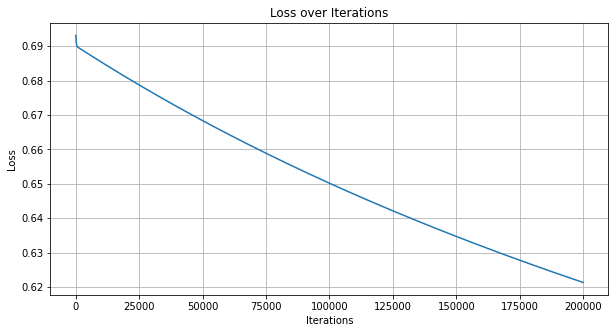

In [26]:
#plotting the loss over the iterations
plt.figure(figsize=(10, 5))
plt.plot(model.losses)
plt.title('Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()